In [1]:
DATA_PATH = 'C:/Users/amityu/Gel_Sheet_Data/'
MOVIE_PATH = DATA_PATH +'Control 050721/'
GRAPH_PATH = 'C:Users/amityu/Gel_Sheet_Graph/'
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from  skimage.filters import gaussian
from tqdm.notebook import trange, tqdm
import pandas as pd
import movie_structure
from  concurrent.futures import ThreadPoolExecutor
import preprocessing
import autocorrelation_and_structure_factor_IK_20220103 as iac
import importlib
from skimage import filters
from p_tqdm import p_map


In [2]:
gel = np.load(MOVIE_PATH +'np/gel.npy', mmap_mode='r')


In [2]:
gel = np.load(MOVIE_PATH +'tmp/gel_norm.npy')#,mmap_mode='r+')


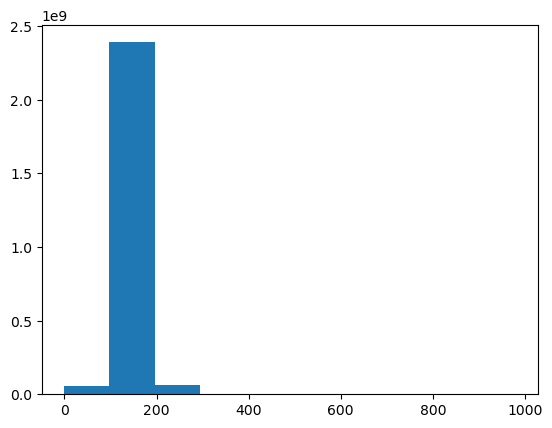

In [49]:
flat = gel.reshape(-1)
plt.hist(flat)
plt.show()

In [3]:
np.min(gel)
np.max(gel)

979.0

In [ ]:
flat = np.array(flat)
flat = np.array([flat[flat<300]])
flat = np.array([flat[flat>100]])
plt.hist(flat)
plt.show()

In [ ]:
flat = gel.reshape(-1).copy()
flat[flat>140] = np.nan
flat[flat<00] = np.nan

plt.figure()
plt.hist(flat[~np.isnan(flat)], bins = 100)
plt.show()

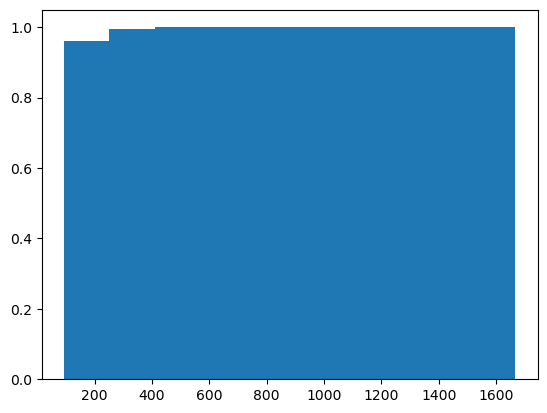

In [52]:
flat = gel[65].reshape(-1)[1:-1:10]
n, bins, patches = plt.hist(flat,cumulative=True, density=True)
plt.show()

In [53]:
min_intensity = bins[1]
max_intensity = 10000

threshold_gel = gaussian(gel[65],3)
threshold_gel[threshold_gel<min_intensity] =0
threshold_gel[threshold_gel>max_intensity] = 0
threshold_gel[np.bitwise_and(threshold_gel>= min_intensity , threshold_gel<= max_intensity)] =1

# np.save(DATA_PATH + 'tmp/t_gel.npy', threshold_gel)



In [18]:
gel = g

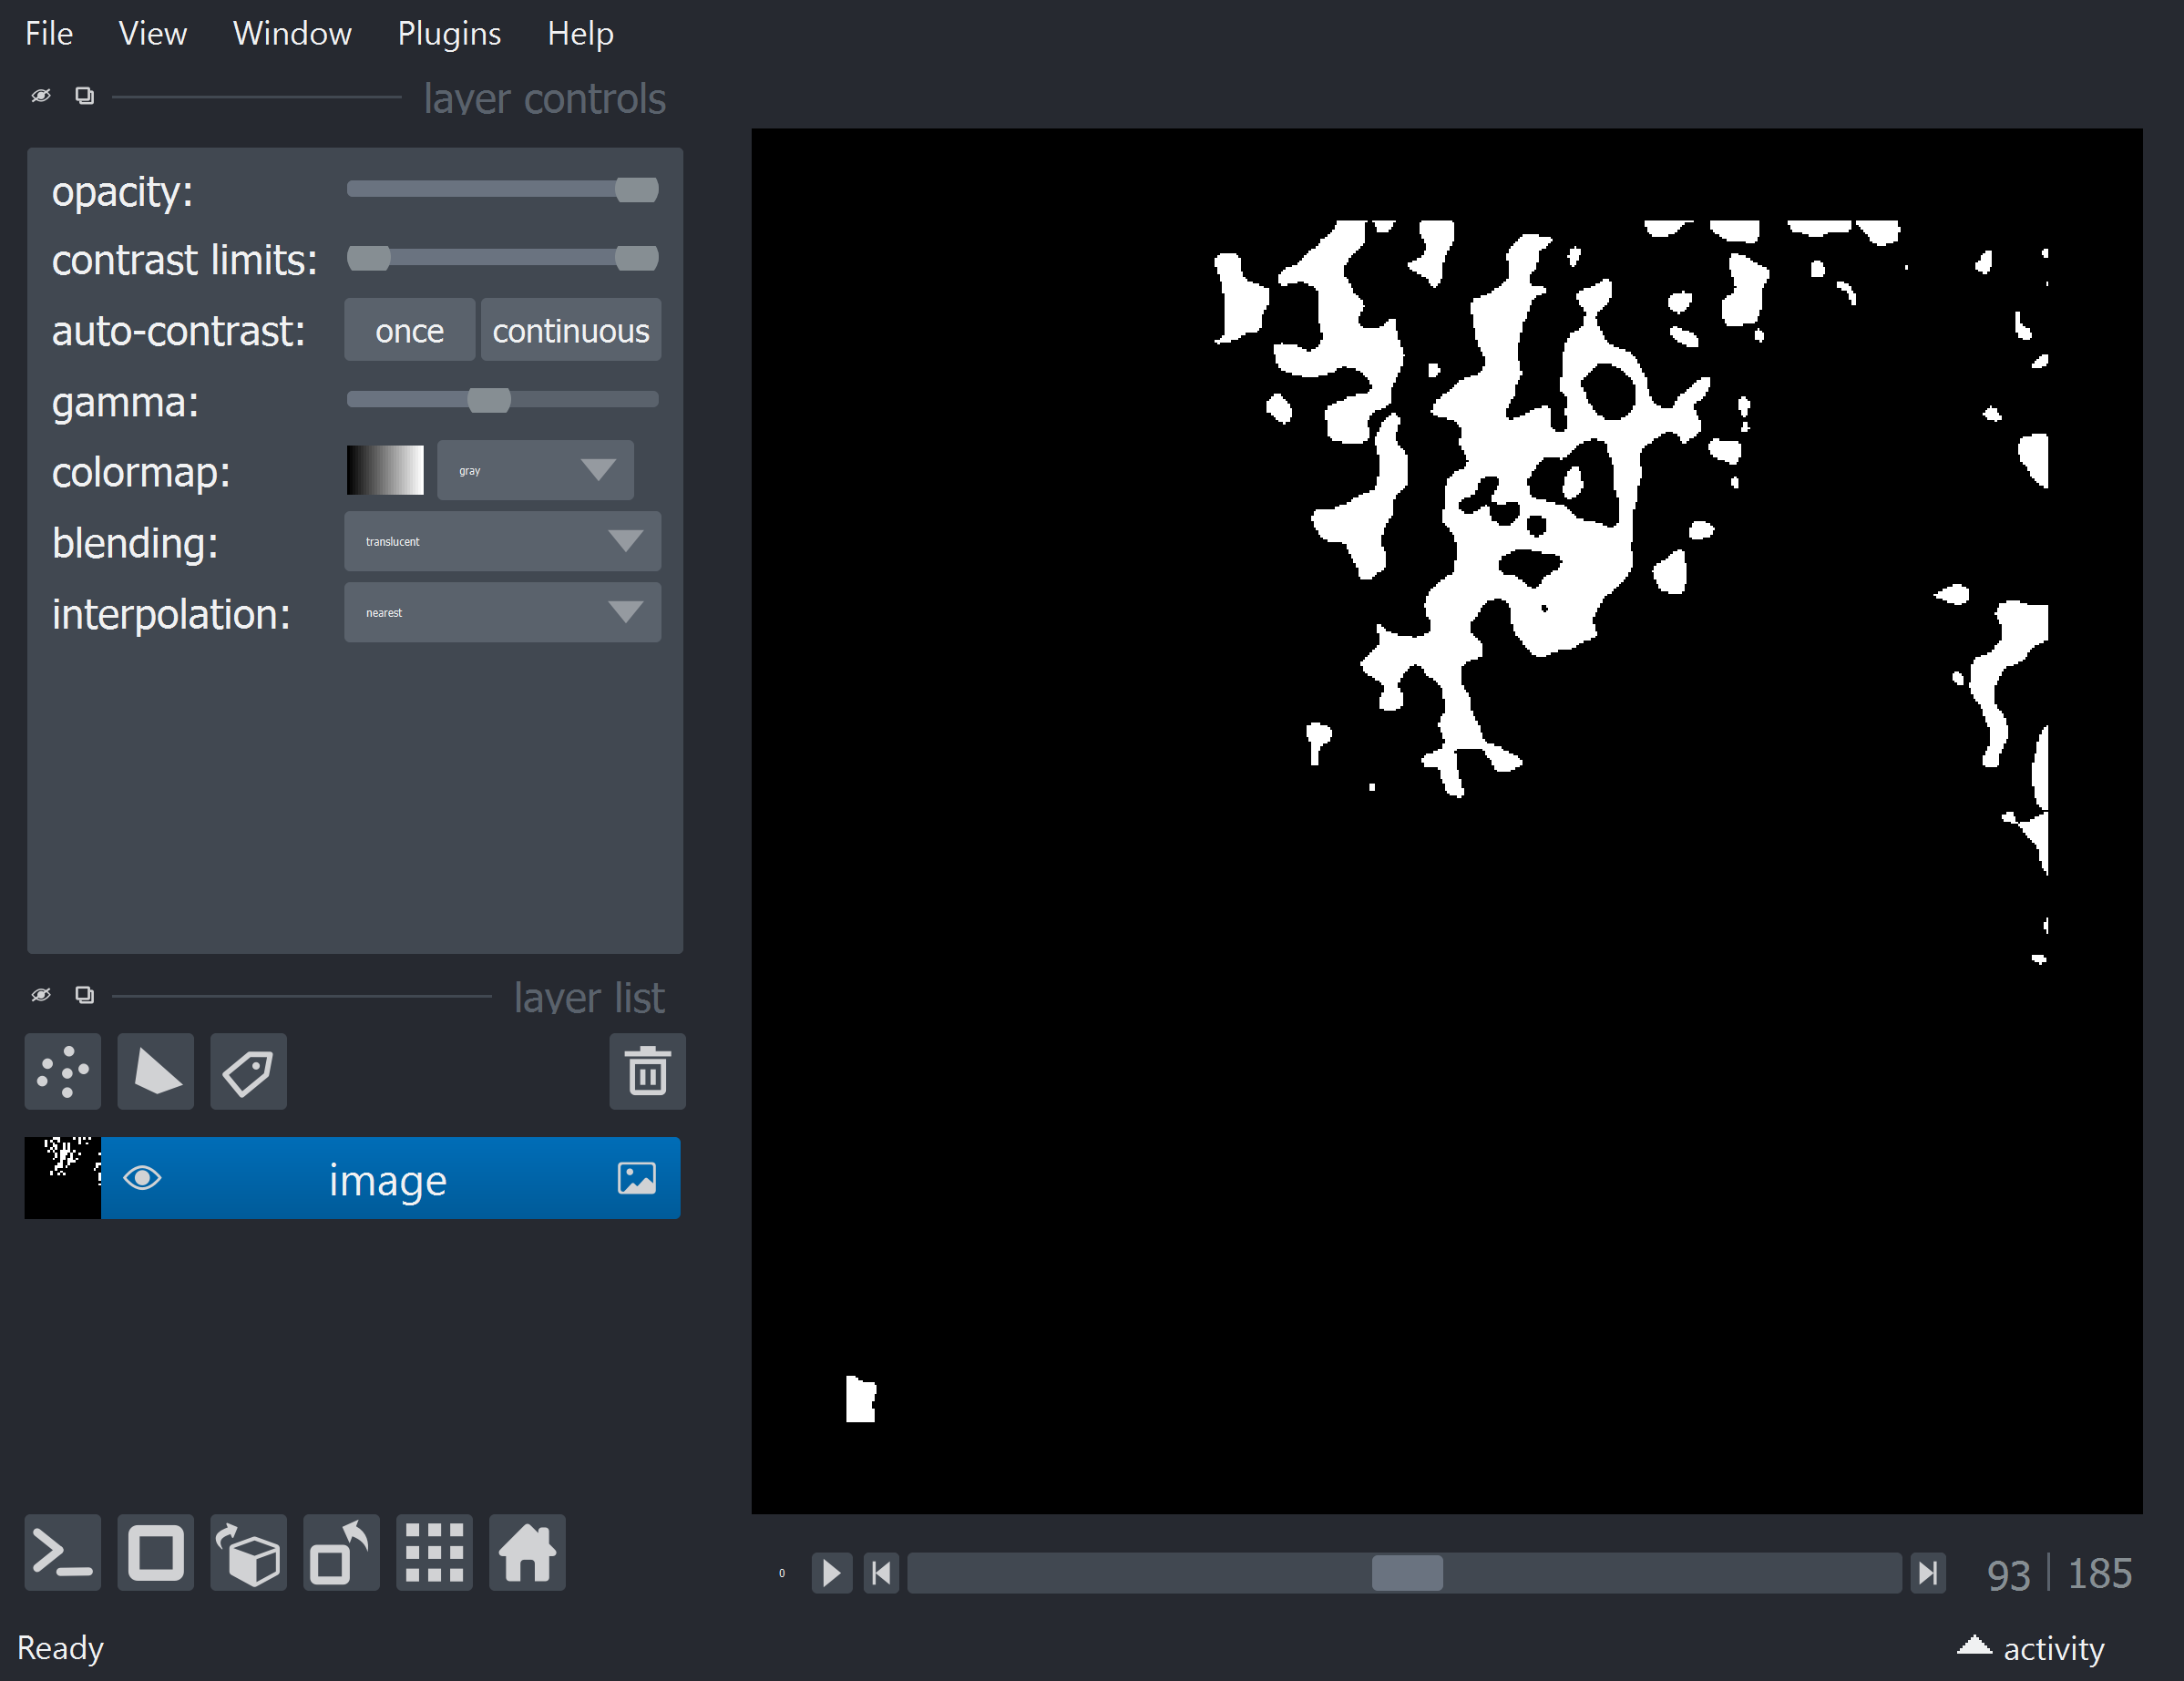

In [21]:
import napari
viewer = napari.Viewer()
image = threshold_gel
viewer.add_image(image)
napari.utils.nbscreenshot(viewer)

In [ ]:
viewer.add_image(gel[:,:,256,:])


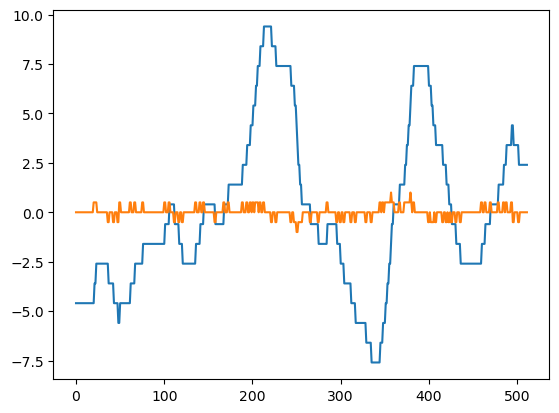

In [6]:
import movie_structure
plane = movie_structure.Vplane(threshold_gel[:,:,256], threshold_gel[:,:,256])
height = plane.set_height()
mean = np.mean(height)
height_difference = height - mean
plt.plot (height_difference)
plt.plot(np.gradient(height))
plt.show()
print()

In [3]:
from  concurrent.futures import ThreadPoolExecutor
gradient_table = np.zeros((len(gel), gel.shape[2]))
height_table = np.zeros((len(gel), gel.shape[2]))
height_deviation = np.zeros((len(gel), gel.shape[2]))

def x(t):
    print('proces %d starts'%t)
    #flat = gel[t].reshape(-1)[1:-1:10]
    # n, bins, patches = plt.hist(flat,cumulative=True,  density=True)
    #hist, bins = np.histogram(flat, density=True)
    #min_intensity = bins[2]

    max_intensity = 10000

    gel_time_point = gel[t]
    for i in range(gel_time_point.shape[1]):
        for j in range(gel_time_point.shape[2]):
            z_line = gel_time_point[:,i,j]
            min_intensity = filters.threshold_li(z_line)

            z_line[z_line < min_intensity] =0
            z_line[z_line>max_intensity] = 0
            z_line[np.bitwise_and(z_line>= min_intensity , z_line<= max_intensity)] =1
    plane = movie_structure.Vplane(gel_time_point[:,:,256], gel_time_point[:,:,256])
    height = plane.set_height()

    height_table[t] = height
    height_deviation[t] = height - np.nanmean(height)

    gradient_table[t] = np.gradient(height)
    print('proces %d ends'%t)
    return height

In [4]:

with ThreadPoolExecutor(max_workers=4) as e:
    for t in trange(len(gel)):
        e.submit(x,t)



  0%|          | 0/95 [00:00<?, ?it/s]

proces 0 starts
proces 1 starts
proces 2 starts
proces 3 starts


C:\Users\amityu\Anaconda3\lib\site-packages\skimage\filters\thresholding.py:757: RuntimeWarning: divide by zero encountered in log
  / (np.log(mean_back) - np.log(mean_fore)))


proces 0 ends
proces 4 starts
proces 2 ends
proces 5 starts
proces 1 ends
proces 6 starts
proces 3 ends
proces 7 starts
proces 4 ends
proces 8 starts
proces 5 ends
proces 9 starts
proces 6 ends
proces 10 starts
proces 7 ends
proces 11 starts
proces 8 ends
proces 12 starts
proces 9 ends
proces 13 starts
proces 10 ends
proces 14 starts
proces 11 ends
proces 15 starts
proces 12 ends
proces 16 starts
proces 13 ends
proces 17 starts
proces 14 ends
proces 18 starts
proces 15 ends
proces 19 starts
proces 18 ends
proces 20 starts
proces 16 ends
proces 21 starts
proces 17 ends
proces 22 starts
proces 19 ends
proces 23 starts
proces 20 ends
proces 24 starts
proces 21 ends
proces 25 starts
proces 22 ends
proces 26 starts
proces 23 ends
proces 27 starts
proces 25 ends
proces 28 starts
proces 24 ends
proces 29 starts
proces 26 ends
proces 30 starts
proces 27 ends
proces 31 starts
proces 28 ends
proces 32 starts
proces 29 ends
proces 33 starts
proces 30 ends
proces 34 starts
proces 31 ends
proces 35

In [18]:
x_index = 320

for tp in tqdm(gel):
    plane = movie_structure.Vplane(tp[:,:,x_index], tp[:,:,x_index])
    height = plane.set_height()

    height_table[t] = height
    height_deviation[t] = height - np.nanmean(height)

    gradient_table[t] = np.gradient(height)

  0%|          | 0/95 [00:00<?, ?it/s]

In [5]:
np.save(MOVIE_PATH + 'tmp/mask.npy', gel)

In [5]:
for t in tqdm([60]):

    x(t)


  0%|          | 0/1 [00:00<?, ?it/s]

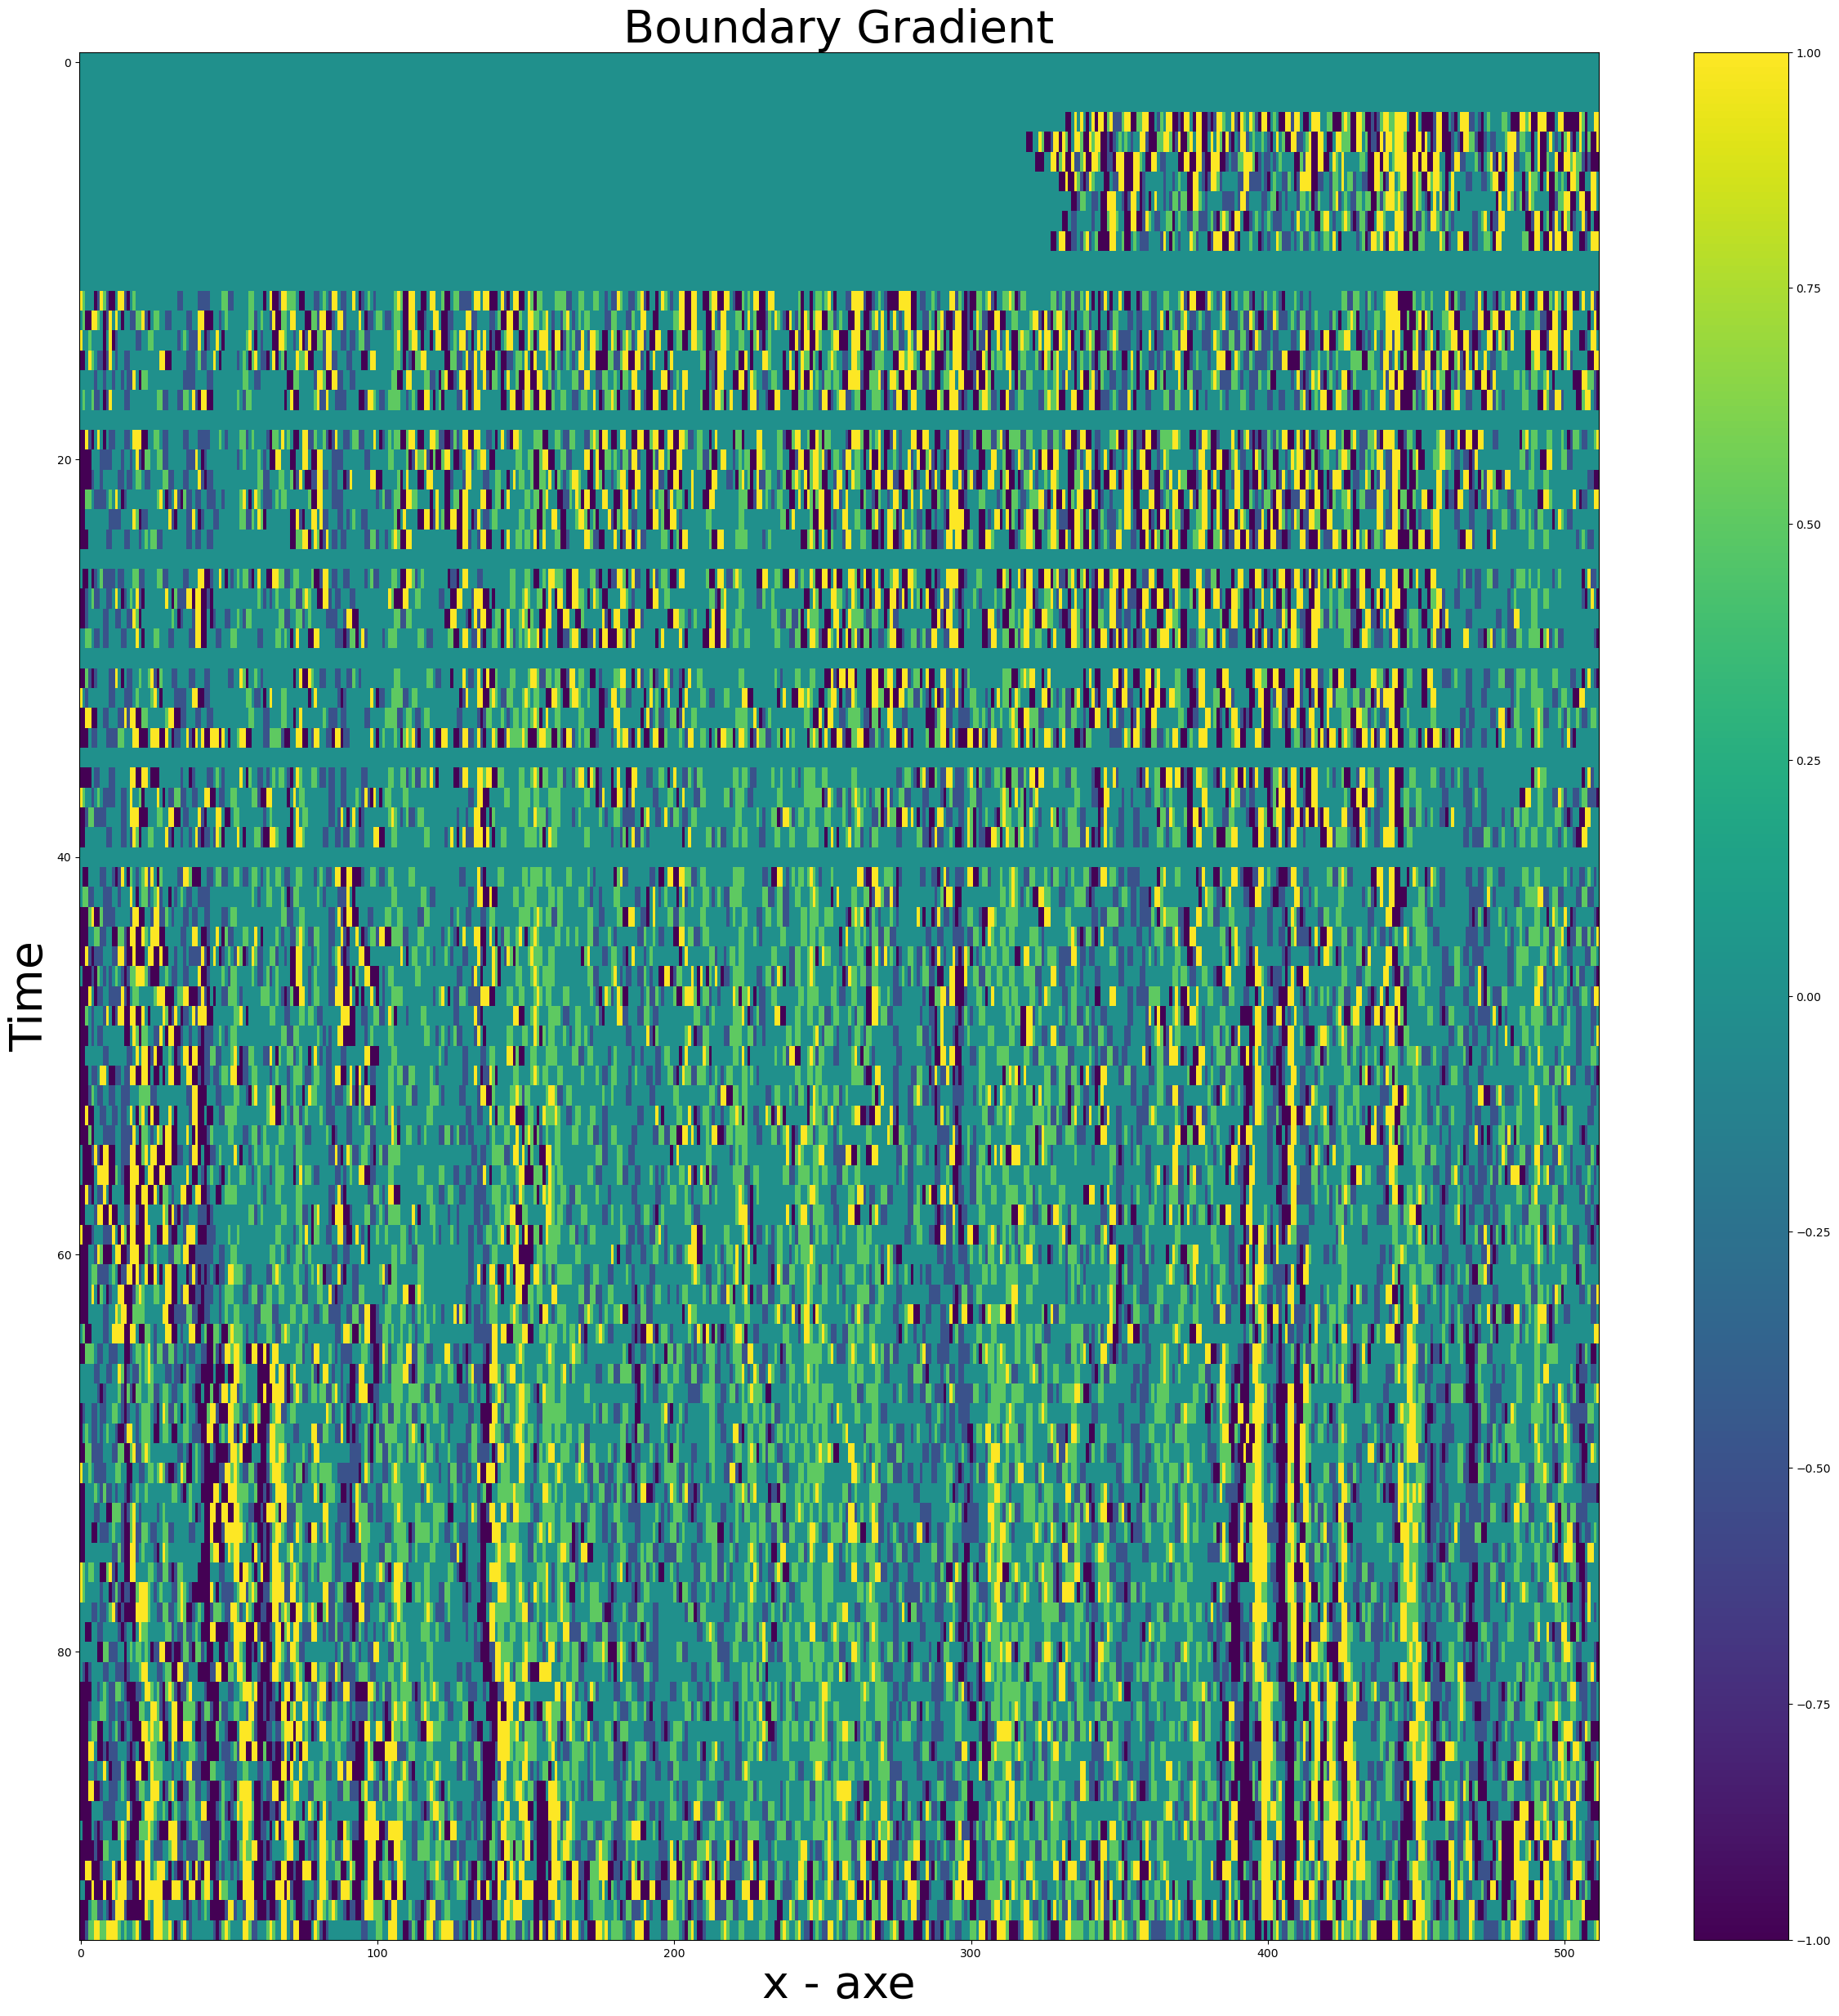

In [19]:
#gradient_table = gradient_table[range(len(gradient_table)-1,0,-1)]
plt.figure(figsize=(30,30))
plt.imshow(gradient_table, vmin= -1, vmax =1, aspect = 'auto')
plt.xlabel('x - axe',  fontsize = 40)
plt.ylabel('Time', fontsize = 40)
plt.title('Boundary Gradient', fontsize = 40)
plt.colorbar()
plt.show()

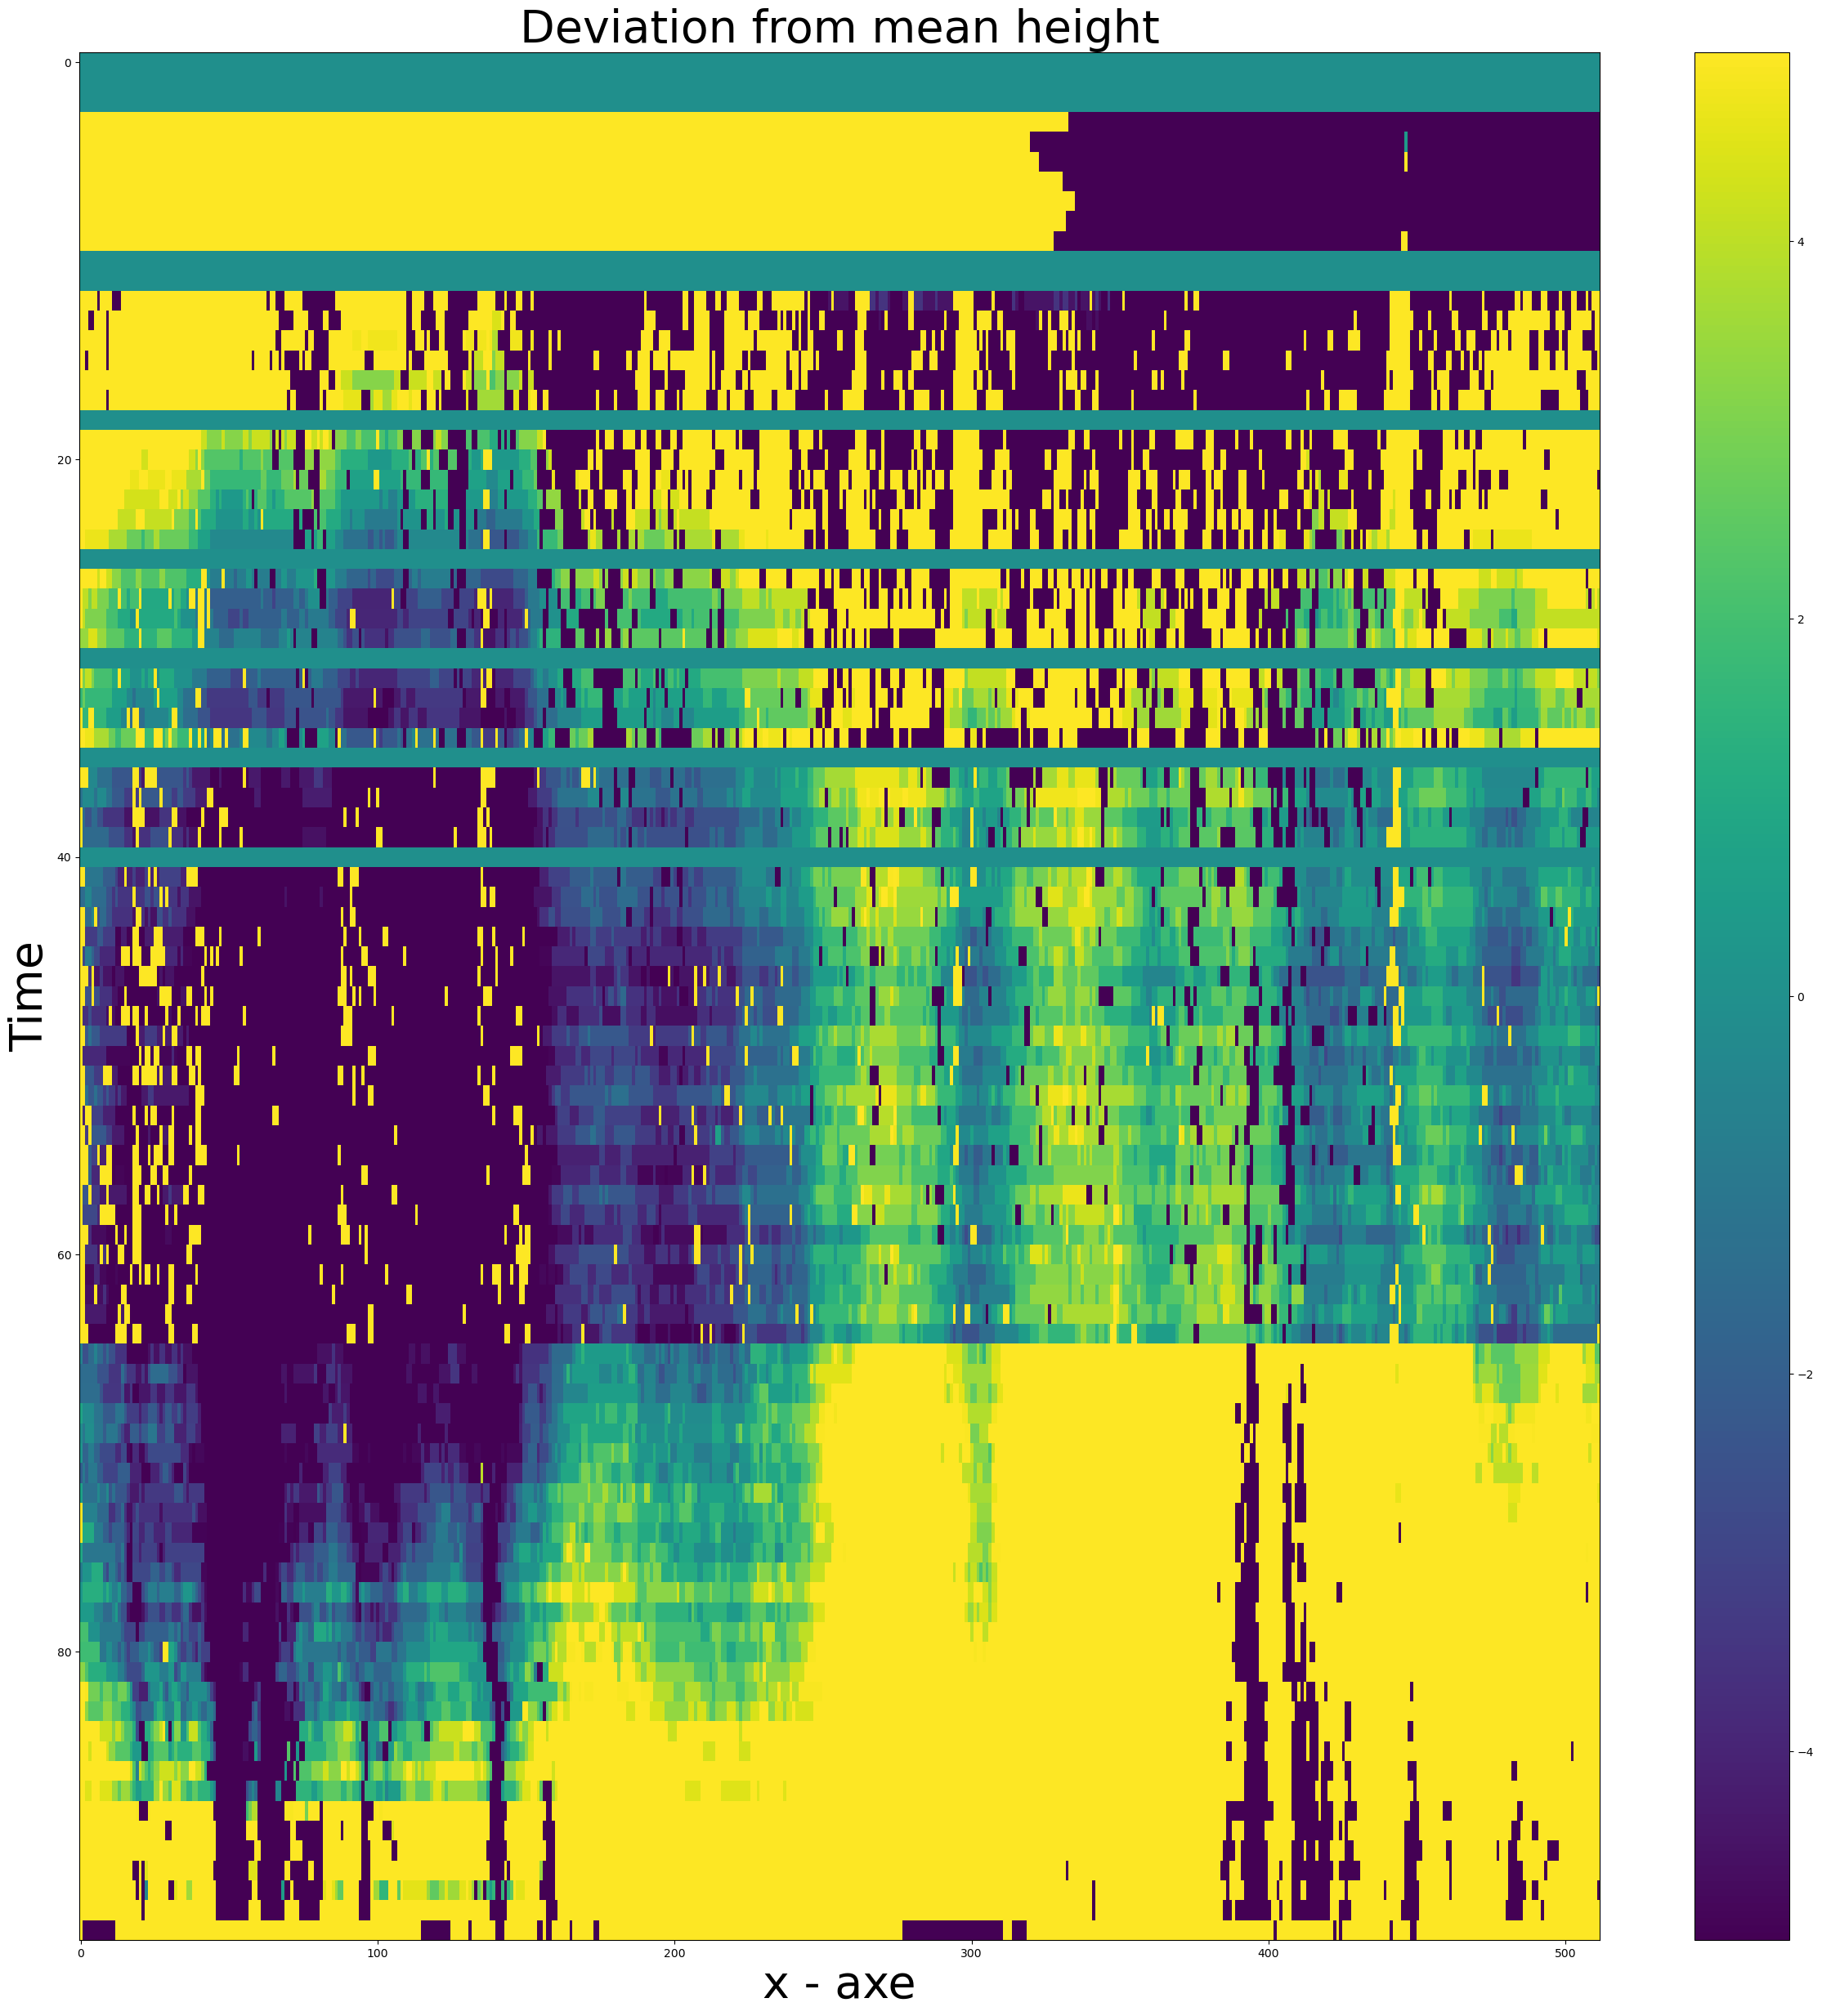

In [20]:
plt.figure(figsize=(30,30))
plt.imshow(height_deviation, vmin = -5, vmax =5 ,aspect = 'auto')
plt.xlabel('x - axe',fontsize = 40)
plt.ylabel('Time', fontsize = 40)
plt.title('Deviation from mean height',fontsize = 40)
plt.colorbar()
plt.show()



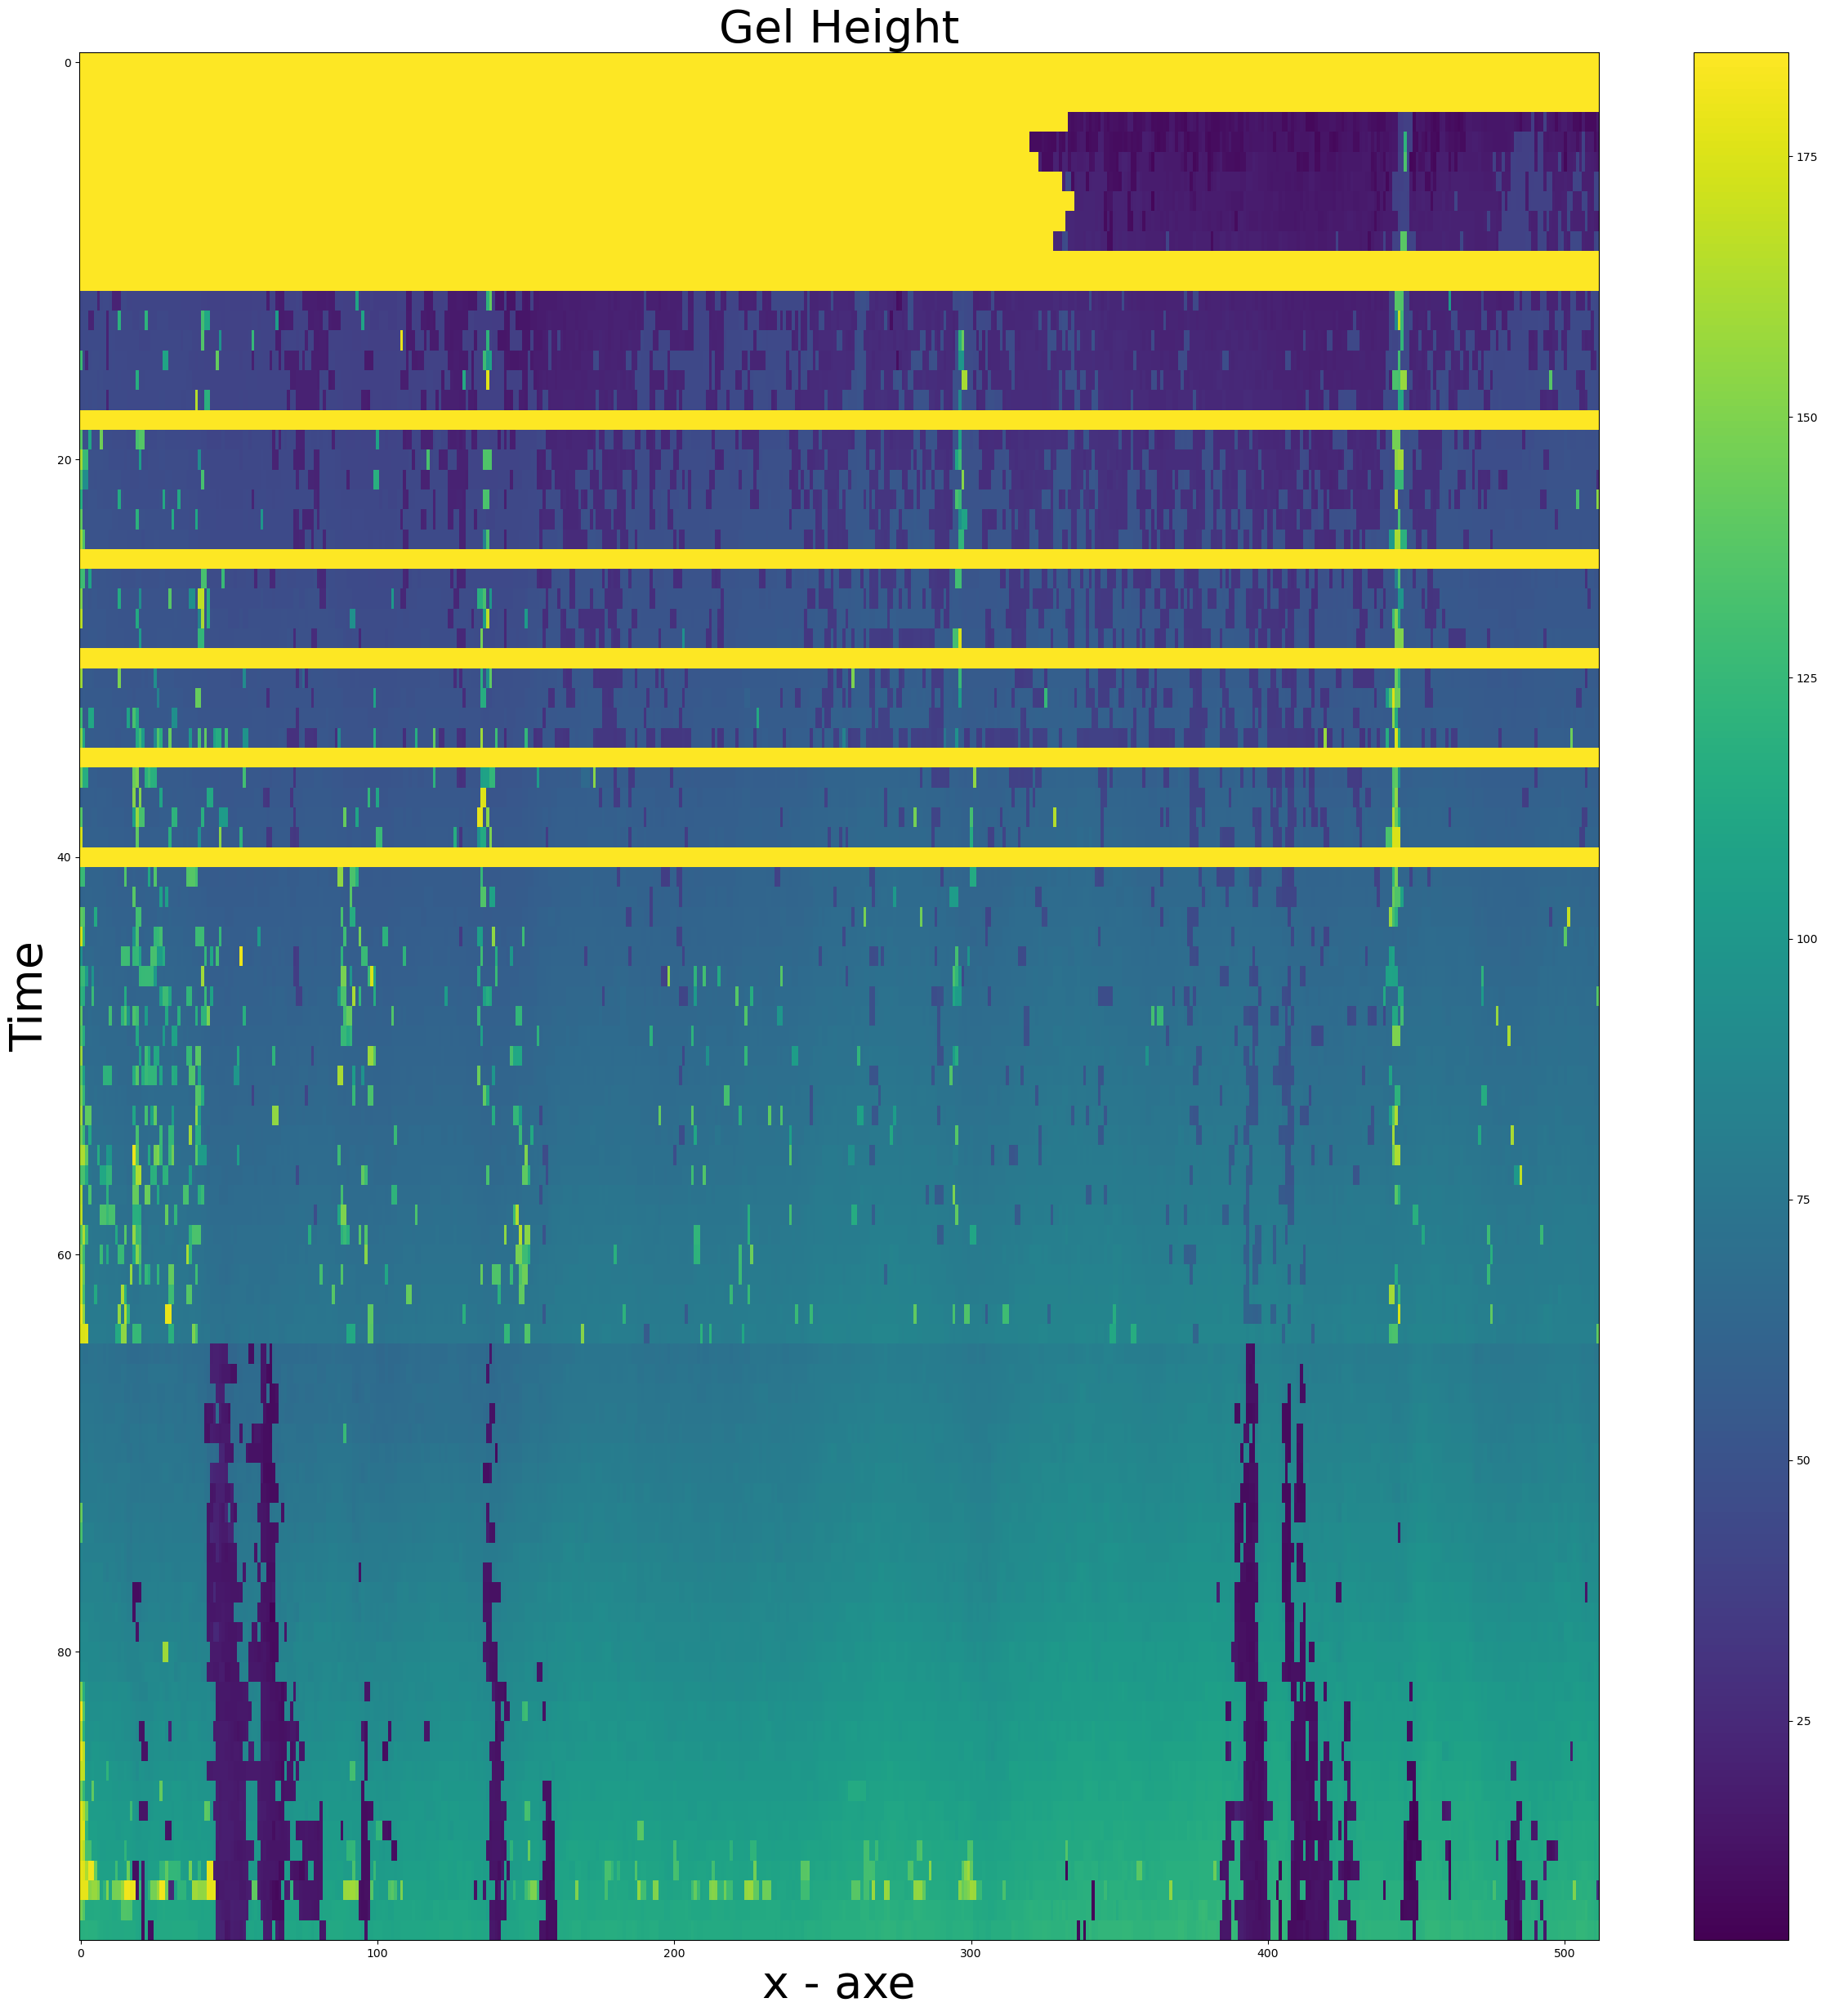

In [8]:
plt.figure(figsize=(30,30))
plt.imshow(height_table, aspect = 'auto')
plt.xlabel('x - axe',fontsize = 40)
plt.ylabel('Time', fontsize = 40)
plt.title('Gel Height',fontsize = 40)
plt.colorbar()
plt.show()


  0%|          | 0/95 [00:00<?, ?it/s]

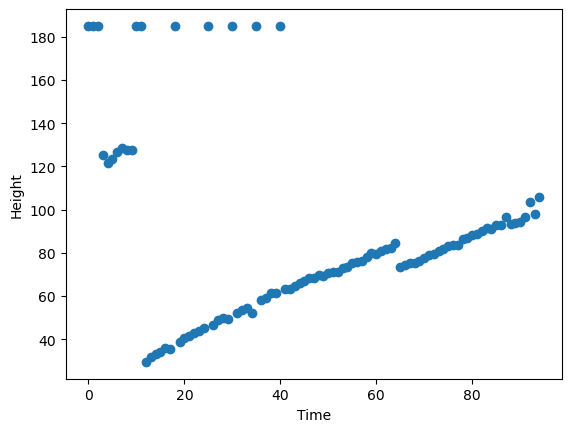

In [17]:
mean_height = np.zeros(len(height_table))
for t in trange(len(height_table)):
    mean_height[t] = np.nanmean(height_table[t])
plt.scatter(range(len(mean_height)),mean_height)
plt.xlabel('Time')
plt.ylabel('Height')
plt.show()

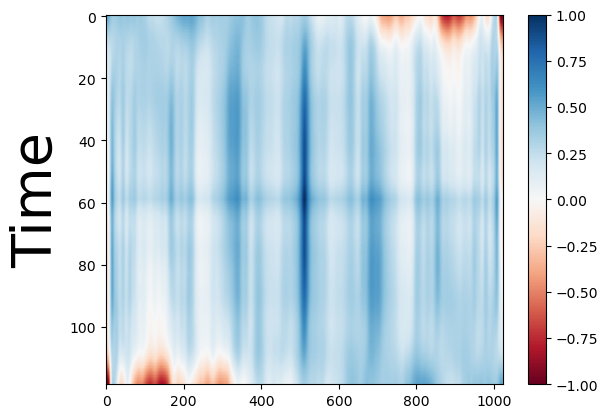

In [68]:
auto = iac.spatial_autocorr(gaussian(gel[:,20,:,256],3), range(160),range(512))
norm_auto = ((auto[0] - auto[0].min())/(auto[0].max() -auto[0].min())-0.5)*2
plt.imshow(norm_auto ,  cmap= cm.get_cmap('RdBu'),aspect = 'auto')
plt.ylabel('Time', fontsize = 40)
plt.colorbar()
plt.show()

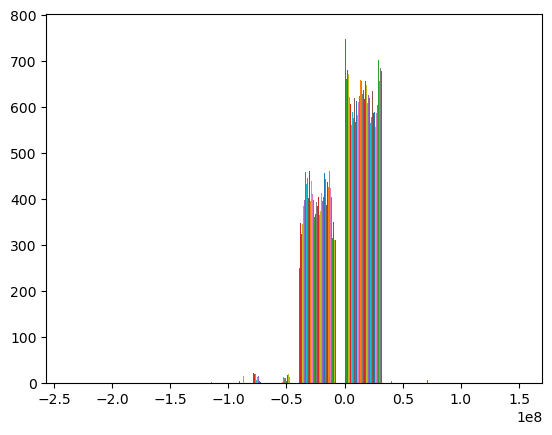

In [7]:
plt.hist(auto[0])
plt.show()

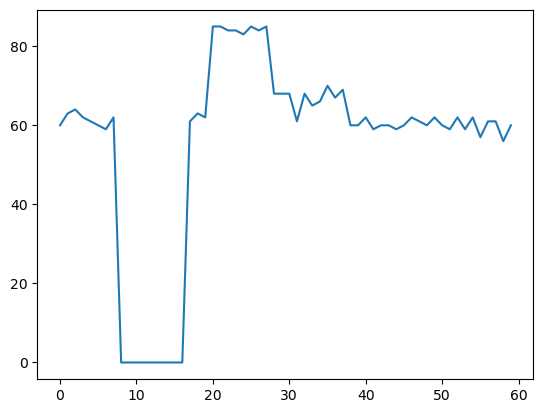

In [16]:
mean_list = []
for t in range(len(gel)):
    mean_list.append((gel[t].min()))
plt.plot(mean_list)
plt.show()

In [81]:
import libpysal

import numpy as np

#np.random.seed(10)
image = gel[20,20,:,:].astype('uint16')
def autocorr(image):
    w = libpysal.weights.lat2W(*image.shape)

    y = image.reshape(-1,1)

    y = np.copy(y)
    from esda.moran import Moran_Local

    lm = Moran_Local(y, w, transformation = "r", permutations = 99)
    return lm.Is.reshape(*image.shape)


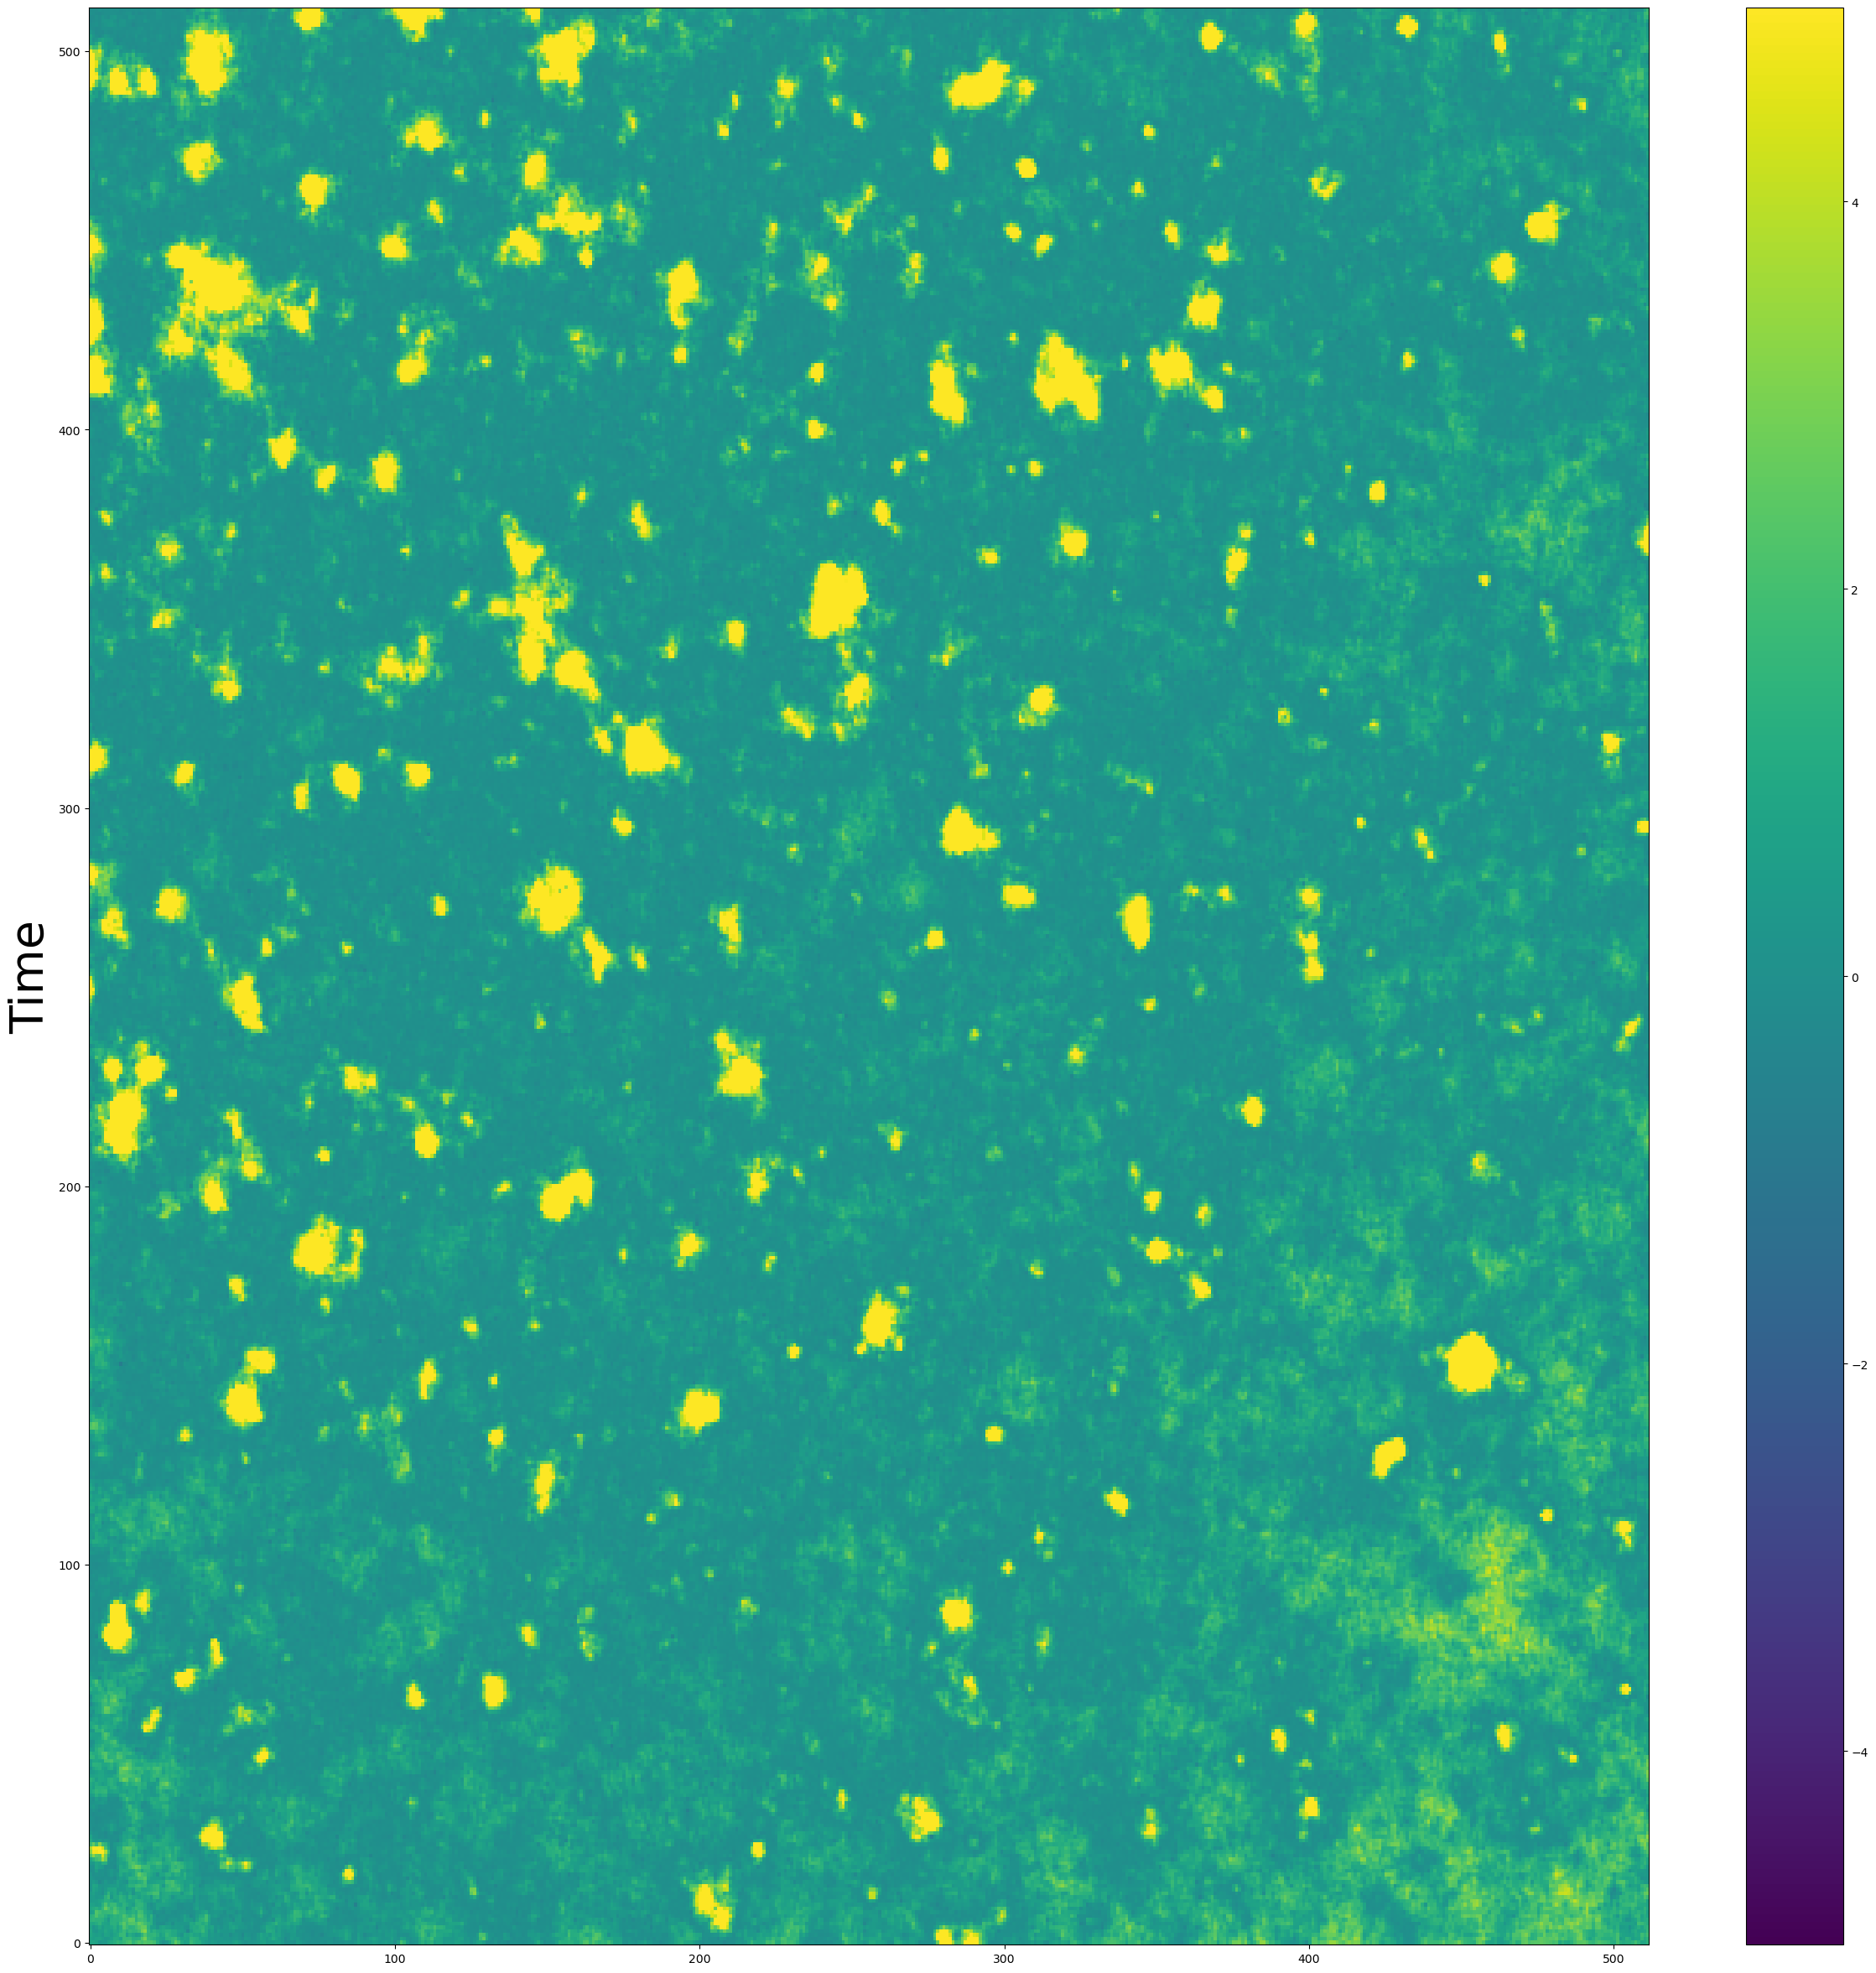

In [82]:
image = gel[20,20,:,:].astype('uint16')
output_image = autocorr(image)

plt.figure(figsize=(30,30))
plt.imshow(output_image, vmin =-5, vmax=5, aspect='auto',origin='lower')
plt.ylabel('Time',fontsize = 40)
plt.colorbar()
plt.show()


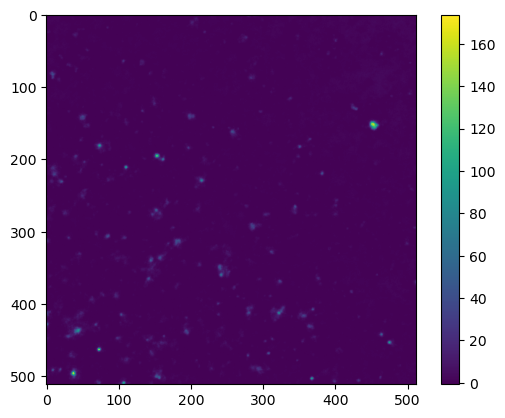

In [72]:
output_image = lm.Is.reshape(*image.shape)
plt.imshow(output_image)
plt.colorbar()
plt.show()


In [76]:
import matplotlib.image as mpimg
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as pl

image = output_image.copy()
def power_spectrum(image):
    npix = image.shape[0]

    fourier_image = np.fft.fftn(image)
    fourier_amplitudes = np.abs(fourier_image)**2

    kfreq = np.fft.fftfreq(npix) * npix
    kfreq2D = np.meshgrid(kfreq, kfreq)
    knrm = np.sqrt(kfreq2D[0]**2 + kfreq2D[1]**2)

    knrm = knrm.flatten()
    fourier_amplitudes = fourier_amplitudes.flatten()

    kbins = np.arange(0.5, npix//2+1, 1.)
    kvals = 0.5 * (kbins[1:] + kbins[:-1])
    Abins, _, _ = stats.binned_statistic(knrm, fourier_amplitudes,
                                         statistic = "mean",
                                         bins = kbins)
    Abins *= np.pi * (kbins[1:]**2 - kbins[:-1]**2)
    return (kvals,Abins)


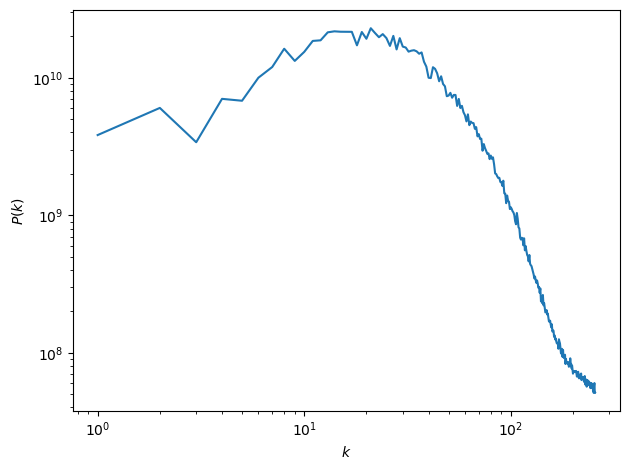

In [77]:
image = output_image.copy()
kvals, Abins =  power_spectrum(image)

pl.loglog(kvals, Abins)
pl.xlabel("$k$")
pl.ylabel("$P(k)$")
pl.tight_layout()
plt.show()

  0%|          | 0/8 [00:00<?, ?it/s]

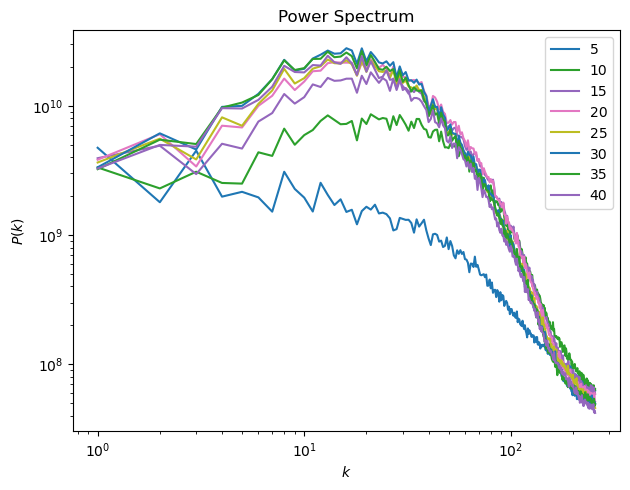

In [98]:
kvals_ls = []
abins_ls = []
for t in trange(5,41,5):
    image = gel[t,20,:,:].astype('uint16')
    output_image = autocorr(image)
    image = output_image.copy()
    kvals, Abins =  power_spectrum(image)
    kvals_ls.append(kvals)
    abins_ls.append(Abins)

    pl.loglog(kvals, Abins, label=str(t))
    pl.xlabel("$k$")
    pl.ylabel("$P(k)$")
    pl.tight_layout()
    pl.loglog(kvals, Abins, ls="None")

df = pd.DataFrame(columns=['kval','abins'])
df['kval'] = kvals_ls
df['abins'] = abins_ls
df.to_csv(GRAPH_PATH + 'spectrum/spectrum.csv')
plt.title('Power Spectrum')
plt.legend()
plt.show()

ValueError: <matplotlib.colors.ListedColormap object at 0x000001A3D4158E50> is not a valid value for color

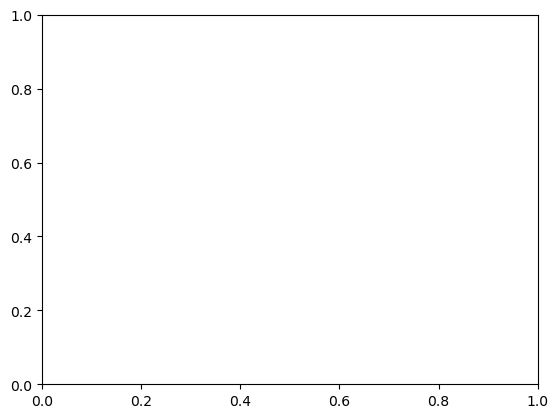

In [93]:
#plt.imshow(image, cmap='Set1')
plt.plot(np.arange(10), np.arange(10)/10, color = cm.get_cmap('Set1'))
plt.show()

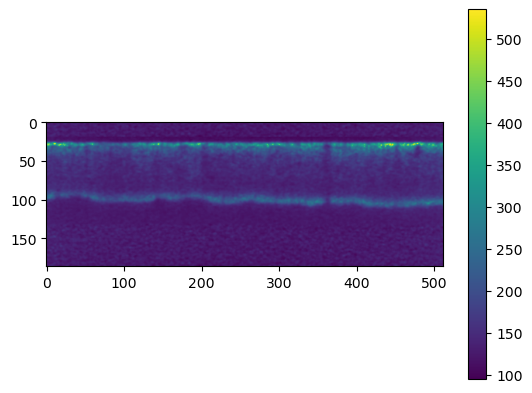

In [37]:
zy = gel[65][:,:,444]
plt.imshow(zy)
plt.colorbar()
plt.show()


(array([59., 65., 35., 10.,  8.,  5.,  1.,  0.,  2.,  1.]),
 array([112., 130., 148., 166., 184., 202., 220., 238., 256., 274., 292.]),
 <BarContainer object of 10 artists>)

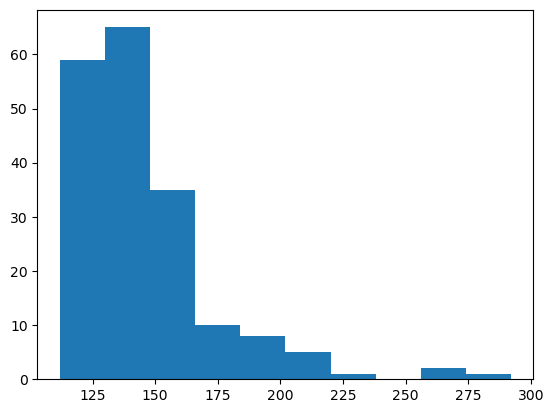

In [38]:
plt.hist(zy[:,40])

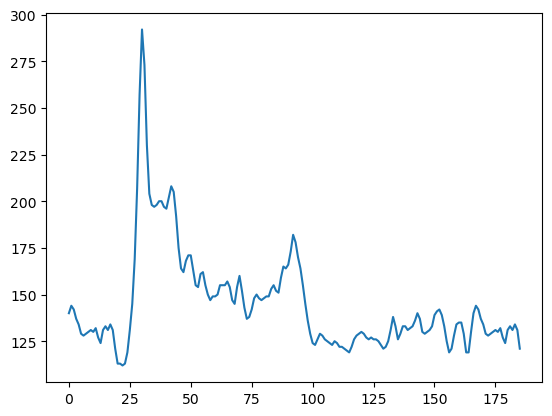

In [39]:
plt.plot(zy[:,40])
plt.show()

In [43]:
from skimage import filters
filters.threshold_li(zy)

164.62689074761255

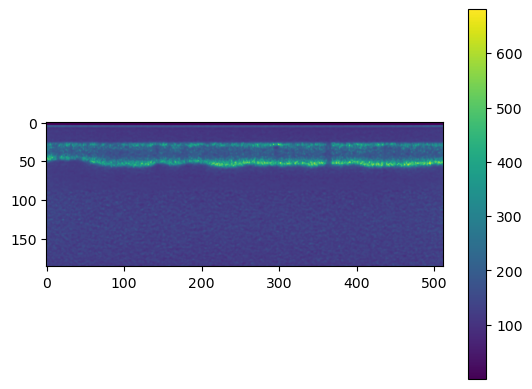

In [72]:
zy = gel[20][:,:,444]
plt.imshow(zy)
plt.colorbar()
plt.show()


(array([ 5.,  0.,  0., 80., 76.,  3.,  9.,  7.,  3.,  3.]),
 array([6.33655116e-03, 3.12319050e+01, 6.24574738e+01, 9.36830444e+01,
        1.24908615e+02, 1.56134186e+02, 1.87359756e+02, 2.18585312e+02,
        2.49810883e+02, 2.81036469e+02, 3.12262024e+02], dtype=float32),
 <BarContainer object of 10 artists>)

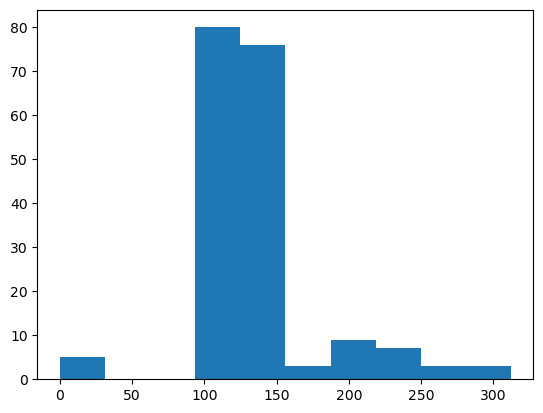

In [73]:
plt.hist(zy[:,40])


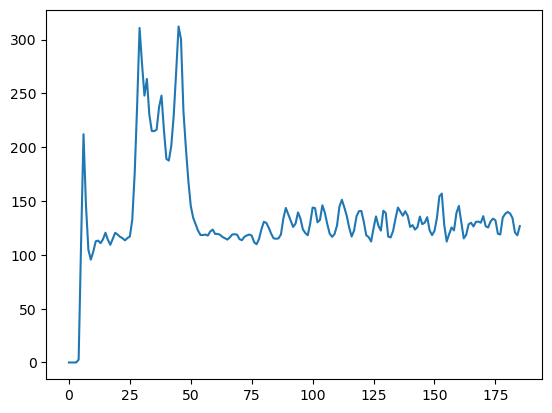

In [77]:
plt.plot(zy[:,40])
plt.show()

In [8]:
h = np.zeros((len(gel), gel.shape[2], gel.shape[3]))


def p(time):
    tp = movie_structure.TimePoint(gel[time])
    h[time] = tp.set_height()

with ThreadPoolExecutor() as e:
    for t in trange(len(gel)):
        e.submit(p,t)



  0%|          | 0/95 [00:00<?, ?it/s]

In [9]:
np.save(MOVIE_PATH + 'tmp/h.npy',h)

In [0]:
mean_height = np.zeros(len(h))
for t in trange(len(h)):
    mean_height[t] = np.nanmean(h[t])

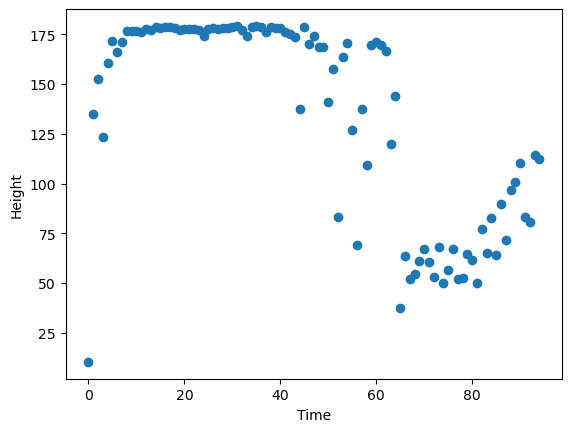

In [12]:
plt.scatter(range(len(h)),mean_height)
plt.xlabel('Time')
plt.ylabel('Height')
plt.show()

In [45]:
g = np.load(MOVIE_PATH +'tmp/gel_uint32.npy')

In [13]:
g.max()

4294967295

In [22]:
viewer.add_image(g[0,:,:,20], name='uint32')

<Image layer 'uint32' at 0x1f02a6fb220>

In [47]:
importlib.reload(preprocessing)

<module 'preprocessing' from 'C:\\Users\\amityu\\DataspellProjects\\gel_sheets\\preprocessing.py'>

In [48]:
g = preprocessing.normalize_to_background(g,0,20,(0,0),(10,10))

  0%|          | 0/95 [00:00<?, ?it/s]

MemoryError: Unable to allocate 17.3 GiB for an array with shape (95, 186, 512, 512) and data type uint32

In [13]:
g_zero = np.load(MOVIE_PATH +'tmp/gel_uint32.npy')


In [15]:
np.mean(g[20]- g_zero[20])

-73.38068353270822

In [ ]:
np.save(MOVIE_PATH +'tmp/gel_norm.npy' , g)

In [36]:
gel[:,0:20,:,:] = gel[:,-20:,:,:].copy()

In [54]:
gel = g